In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

import sys
dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"

sys.path.append(dir_BinnedFit)
from binnedFit_utilities import load_pickle
from chainTool import ChainTool

# load chainInfo

In [2]:
dir_file = '/Users/hhg/Research/kinematic_lensing/data/chainBFforward/'
chainfile = dir_file +'chainBF_Ha_noise0_g10.05_g20.05_sini0.5_z0.40_thetaINT0.0_sW0.06_256_300k_D0521.pkl'
chainInfo = load_pickle(chainfile)
print(chainInfo['chain'].shape)

pars = chainInfo['par_fid']

(100, 3000, 10)


In [3]:
Chain = ChainTool(chainInfo, Nburn=100*1500, Nend=100*3000)
Chain.add_vsini()

In [4]:
from chainconsumer import ChainConsumer
blue        = "#214F94"
red         = "#CC0204"
yellow      = "#FFA903"
gray        = "#858278"
black       = "#000000"
green       = "#73ab24"
purple      = "#8600C8"
lightblue   = "#6898FF"
lightblue2  = "#82b9e6"
yellowgreen = "#8dcd32" #"#8DE900"
lightteal   = "#7FC2BF"
teal        = "#51ABAE"
lightgray   = "#CDCDCD"

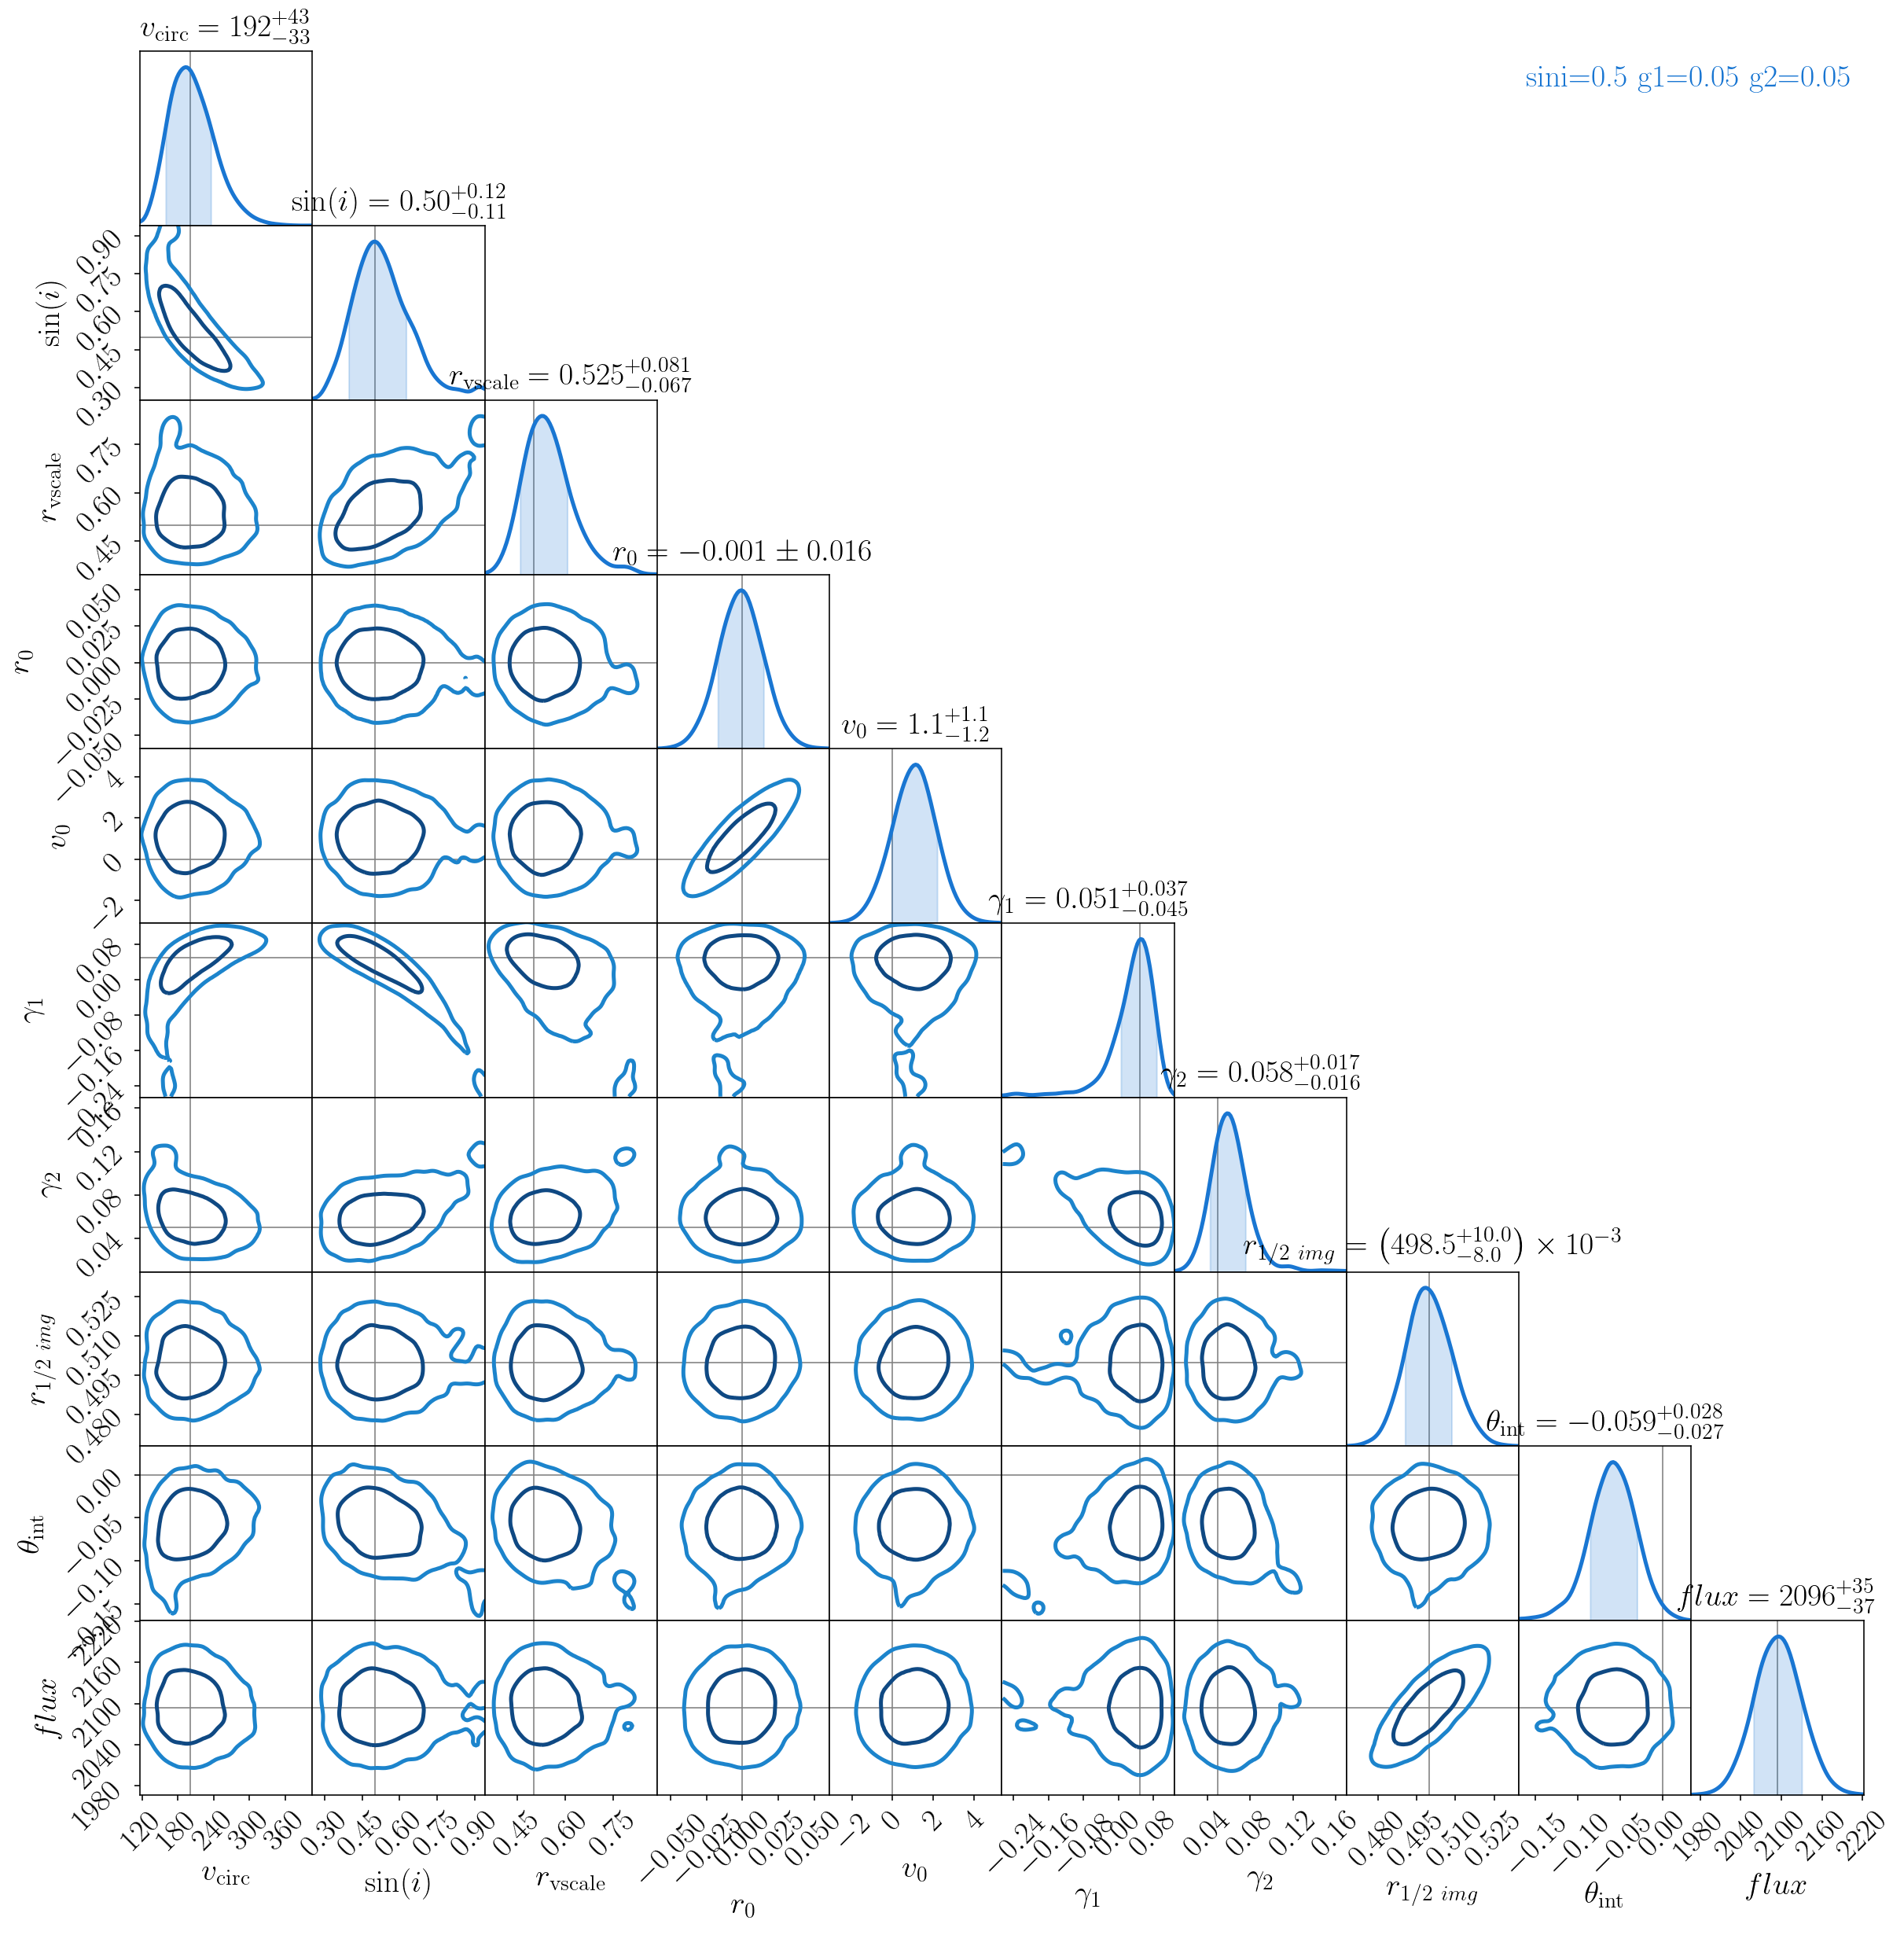

In [5]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = chainInfo['par_key']

#legend_chain = "sini=%.1f"%pars['sini']
g1=pars['g1']
g2=pars['g2']
sini=pars['sini']
legend_chain = f"sini={sini} g1={g1} g2={g2}"

parID1, parName1, par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain.chain[:, parID1], parameters=parName1, name=legend_chain)

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=20,tick_font_size=20,
            shade=[False]*Nchains,
            statistics=statistics,summary=True)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2.5 + fig.get_size_inches())
fig.savefig("_fig_chain.pdf", transparent=True)

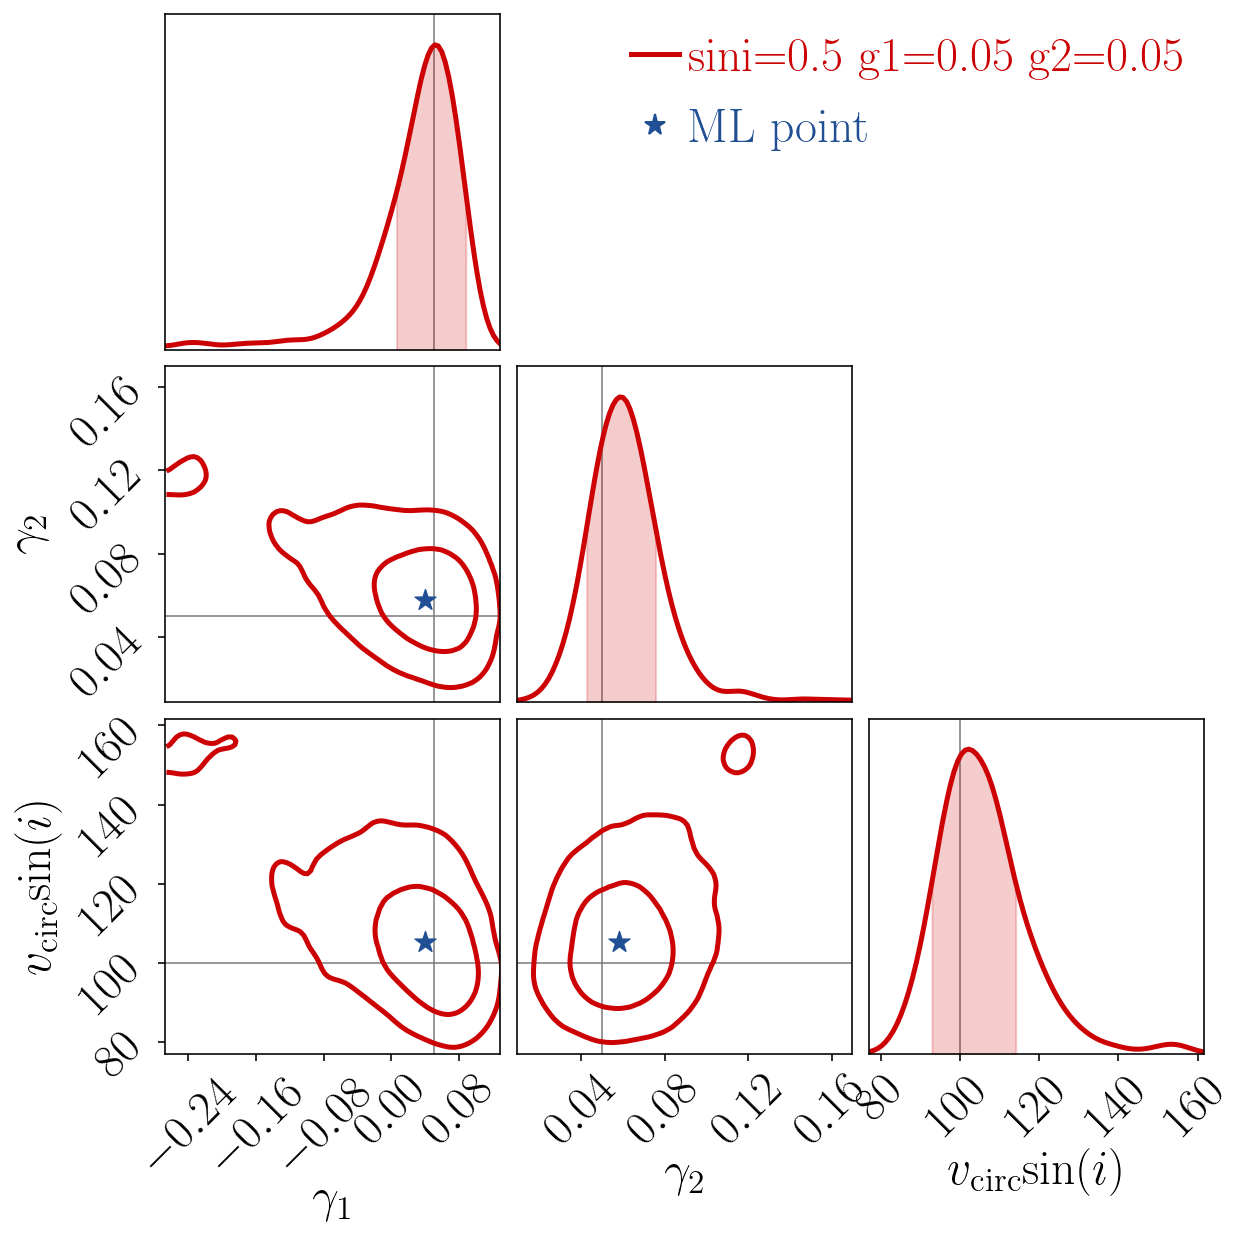

In [6]:
Nchains = 2
colors = [red, blue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = ['g1','g2', 'vsini'] #, 'v_0'

legend_chain = f"sini={pars['sini']} g1={pars['g1']} g2={pars['g2']}"


parID1,parName1,par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain.chain[:, parID1]    , parameters=parName1 ,name=legend_chain)

MLmain, MLmain0 = Chain.par_maxlike()
c.add_marker(MLmain[parID1], parameters=parName1, marker_style='*', marker_size=120, name='ML point')

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=24,tick_font_size=24,
            shade=[False]*Nchains,
            colors=colors,
            linestyles=lines,
            statistics=statistics,
            shade_gradient=[0]*Nchains,
            summary=True) #,color_params='posterior'

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.14, right=0.9, bottom=0.14, top=0.9)

fig.set_size_inches(5.0 + fig.get_size_inches())
fig.savefig("_figchain1.pdf", transparent=True)

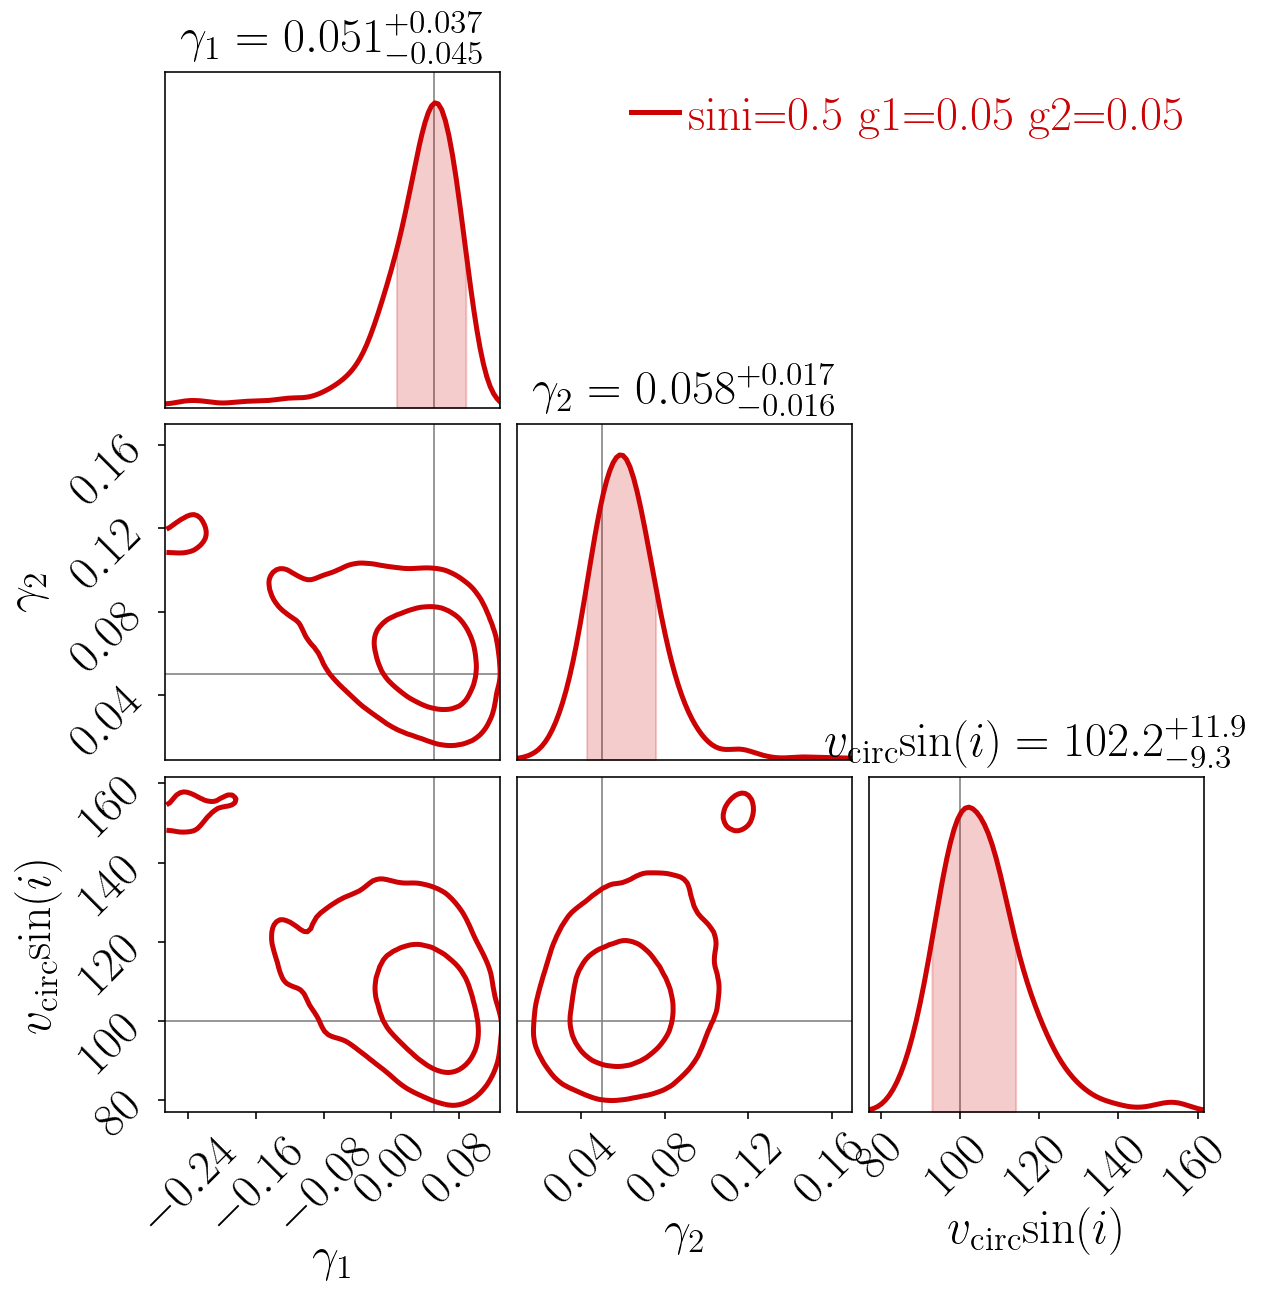

In [7]:
Nchains = 1
colors = [red, blue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = ['g1','g2', 'vsini'] #, 'v_0'

legend_chain = f"sini={pars['sini']} g1={pars['g1']} g2={pars['g2']}"


parID1,parName1,par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain.chain[:, parID1]    , parameters=parName1 ,name=legend_chain)

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=24,tick_font_size=24,
            shade=[False]*Nchains,
            colors=colors,
            linestyles=lines,
            statistics=statistics,
            shade_gradient=[0]*Nchains,
            summary=True) #,color_params='posterior'

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.14, right=0.9, bottom=0.14, top=0.9)

fig.set_size_inches(5.0 + fig.get_size_inches())
fig.savefig("_figchain.pdf", transparent=True)

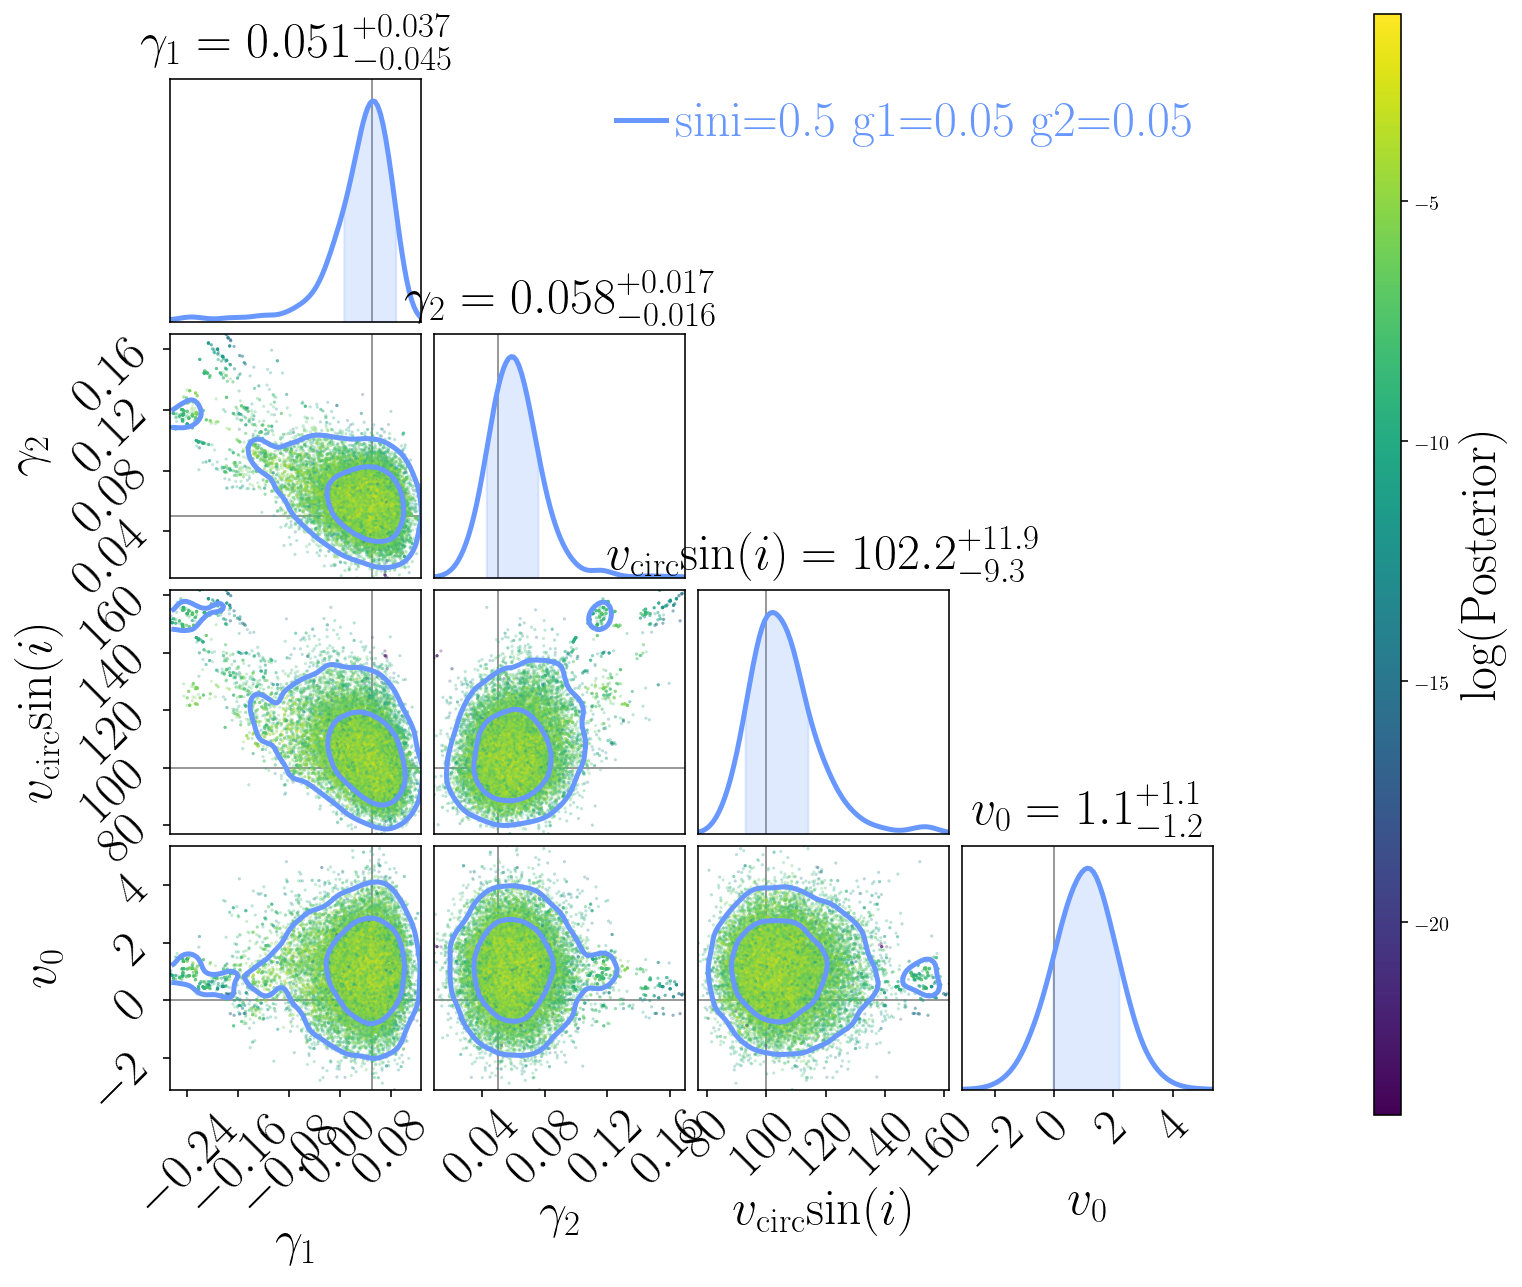

In [8]:
Nchains = 1
colors = [lightblue, yellow, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = ['g1','g2', 'vsini', 'v_0']

legend_chain = f"sini={pars['sini']} g1={pars['g1']} g2={pars['g2']}"


parID1,parName1,par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain.chain[:, parID1]    , parameters=parName1 ,name=legend_chain, posterior=Chain.lnprob)
#c.add_chain(subchain[:, parID1]       , parameters=parName1 ,name='sub chain')

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=25, tick_font_size=25,
            shade=[False]*Nchains,
            colors=colors,
            linestyles=lines,
            statistics=statistics,
            shade_gradient=[0]*Nchains,
            summary=True,
            color_params='posterior')


c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)


fig.set_size_inches([4.5,3] + fig.get_size_inches())
fig.subplots_adjust(left=0.12, right=0.75, bottom=0.12, top=0.9)


fig.savefig("_figchain.pdf", transparent=True)

# ML points

In [9]:
MLmain, MLmain0 = Chain.par_maxlike()

print('maximum logLike: ', MLmain0)

for ind, key in enumerate(chainInfo['par_key']):
    print(f'{key} : {MLmain[ind]:.2f}')

maximum logLike:  -1.1134240845101073
vcirc : 198.97
sini : 0.53
vscale : 0.54
r_0 : 0.00
v_0 : 1.61
g1 : 0.04
g2 : 0.06
r_hl_image : 0.50
theta_int : -0.06
flux : 2087.54


## gen mock dataInfo, and GammaInference obj.

In [10]:
dir_binnedFit = dir_repo + '/BinnedFit'
sys.path.append(dir_binnedFit+'/tests')
from get_pars import get_pars0
from gen_mocks import gen_mock_tfCube
from gamma import GammaInference
from binnedFit_utilities import velocity_to_lambda

pars, _ = get_pars0()
pars['g1'] = Chain.par_fid['g1']
pars['g2'] = Chain.par_fid['g2']
pars['ngrid'] = Chain.par_fid['ngrid']
pars['slitWidth'] = Chain.par_fid['slitWidth']
dataInfo = gen_mock_tfCube(pars, 'Halpha', slits='both', noise_mode=0)

# ----------------------
GI = GammaInference(dataInfo, active_par_key=[
    'vcirc', 'sini', 'vscale', 'r_0', 'v_0', 'g1', 'g2',  'r_hl_image', 'theta_int', 'flux'], par_fix=None, vTFR_mean=200.)

In [11]:
active_par_fid = [GI.par_fid[key] for key in GI.active_par_key]

print('par fid')
for ind, key in enumerate(GI.active_par_key):
    print(f'  {key} : {active_par_fid[ind]:.2f}')

par fid
  vcirc : 200.00
  sini : 0.50
  vscale : 0.50
  r_0 : 0.00
  v_0 : 0.00
  g1 : 0.05
  g2 : 0.05
  r_hl_image : 0.50
  theta_int : 0.00
  flux : 2094.54


# check fit status at par_in

In [12]:
active_par_in = MLmain
#active_par_in = active_par_fid

par_in = GI.Pars.gen_par_dict(active_par=active_par_in, active_par_key=GI.active_par_key, par_ref=GI.par_base)

# ----- modify parameters values in par_in -----
#set_theta_int = -10.*np.pi/180.
#par_in['theta_int'] = set_theta_int
#active_par_in[GI.active_par_key.index('theta_int')] = set_theta_int
# -----------------------------------------------

print('par_in')
for ind, key in enumerate(GI.active_par_key):
    print(f'  {key} : {active_par_in[ind]:.2f}')

par_in
  vcirc : 198.97
  sini : 0.53
  vscale : 0.54
  r_0 : 0.00
  v_0 : 1.61
  g1 : 0.04
  g2 : 0.06
  r_hl_image : 0.50
  theta_int : -0.06
  flux : 2087.54


In [13]:
logPrior_vcirc = GI.Pars.logPrior_vcirc(vcirc=par_in['vcirc'], sigma_TF_intr=GI.sigma_TF_intr, vTFR_mean=GI.vTFR_mean)
logL_image, model_img = GI._cal_loglike_image(par_in)
logL_spec0, model_spec0 = GI._cal_loglike_spec(par_in, IDspec=0)
logL_spec1, model_spec1 = GI._cal_loglike_spec(par_in, IDspec=1)

totL = GI.cal_loglike(active_par_in)
print(f'tot logLike: {totL:.3f}')
print(f'  logPrior: {logPrior_vcirc:.3f}')
print(f'  logL_image: {logL_image:.3f}')
print(f'  logL_spec0: {logL_spec0:.3f}')
print(f'  logL_spec1: {logL_spec1:.3f}')

tot logLike: -1.113
  logPrior: -0.000
  logL_image: -0.113
  logL_spec0: -0.366
  logL_spec1: -0.634


## display - overplot

In [14]:
from IPython.display import display as ipython_display

/Users/hhg/Research/kinematic_lensing/repo/BinnedFit/notebook/../../BinnedFit/../TNGcube/TNGcube.py:834: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


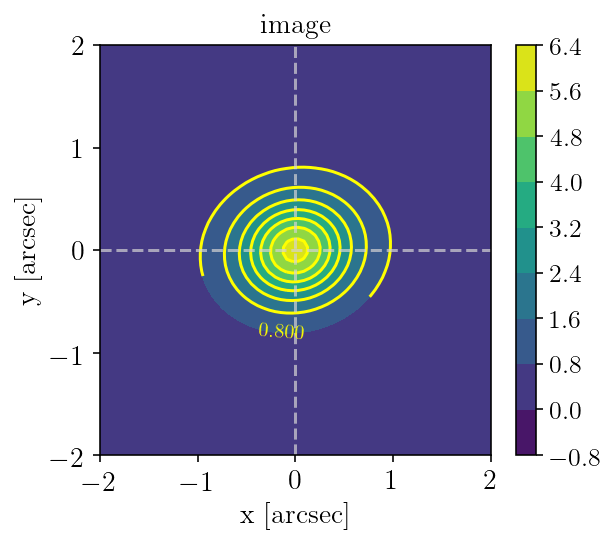

In [15]:
fig0, ax0 = dataInfo['image'].display(xlim=[-2.,2.], model=model_img)

### spec major

time cost in gaussFit_spec2D: 0.13438916206359863 (secs)


/Users/hhg/Research/kinematic_lensing/repo/BinnedFit/notebook/../../BinnedFit/spec2D.py:216: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


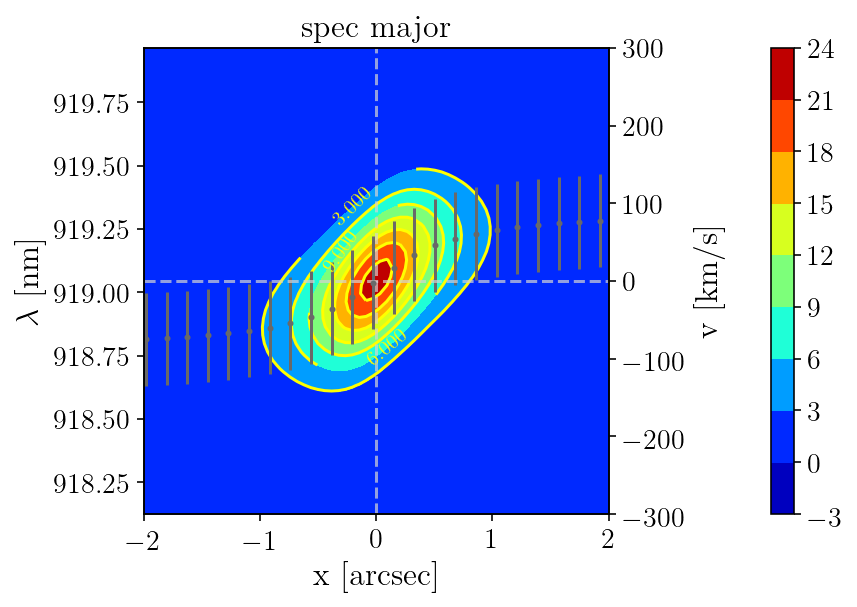

In [16]:
lambda0, z = dataInfo['par_fid']['lambda0'], dataInfo['par_fid']['redshift']
ylim = velocity_to_lambda(v=[-300.,300.], lambda0=lambda0, z=z)

fig1, ax1 = dataInfo['spec'][0].display(xlim=[-2.,2.], ylim=ylim, model=model_spec0, mark_fit=True, title='spec major')

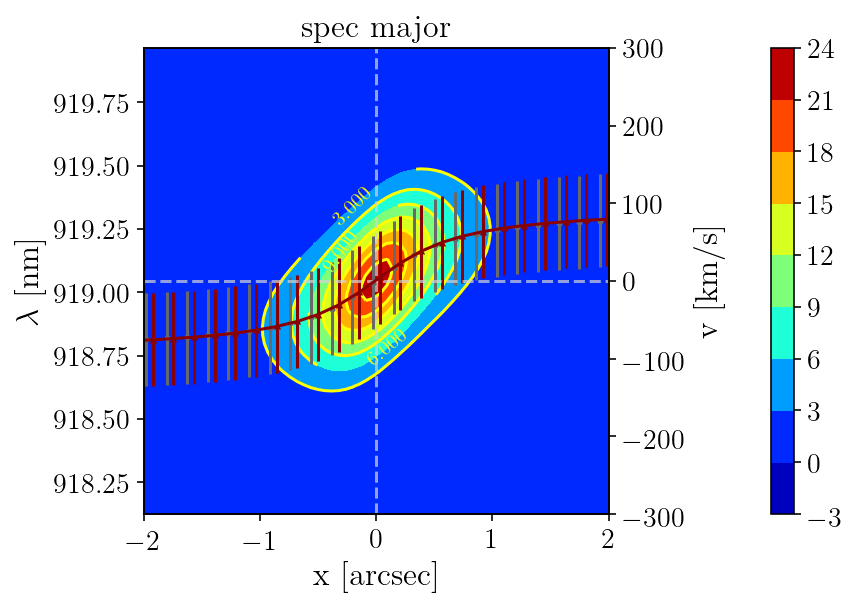

In [17]:
cenLambda, amp, sigma = GI._cal_bestfit_specStats(par_in, IDspec=0)
spaceGrid = GI.RFs[0].spec2D.spaceGrid
ax1.errorbar(spaceGrid[2::3], cenLambda[2::3], sigma[2::3], color='darkred', marker='^', markersize=2, ls='-')
ipython_display(fig1)

### spec minor

time cost in gaussFit_spec2D: 0.18142294883728027 (secs)


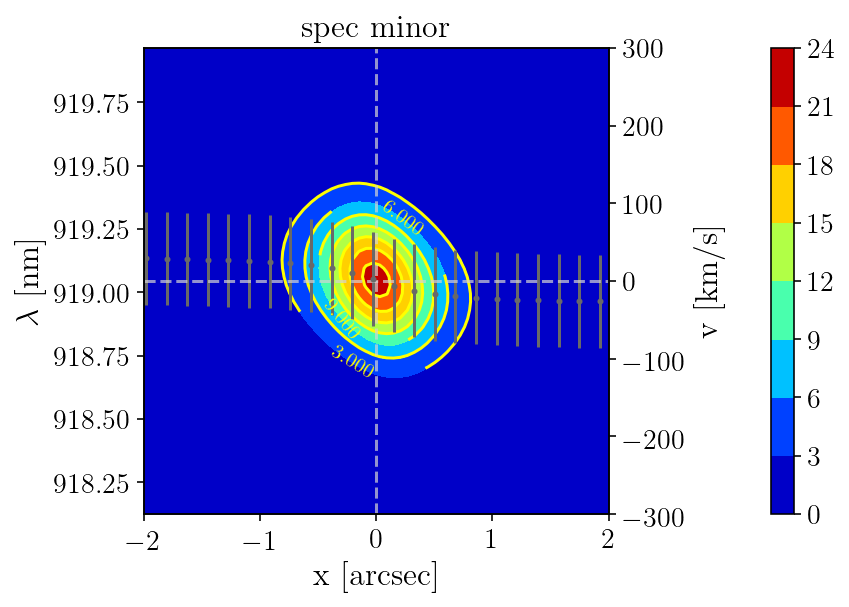

In [18]:
fig2, ax2 = dataInfo['spec'][1].display(xlim=[-2.,2.], ylim=ylim, model=model_spec1, mark_fit=True, title='spec minor')

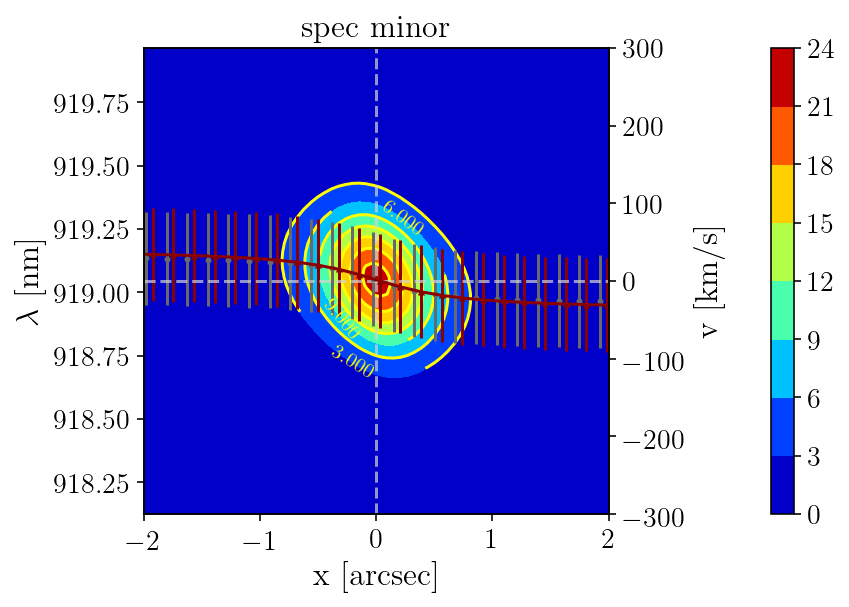

In [19]:
cenLambda, amp, sigma = GI._cal_bestfit_specStats(par_in, IDspec=1)
spaceGrid = GI.RFs[1].spec2D.spaceGrid
ax2.errorbar(spaceGrid[2::3], cenLambda[2::3], sigma[2::3], color='darkred', marker='^', markersize=2, ls='-')
ipython_display(fig2)

### residual analyses 

In [20]:
dir_TNGcube = dir_repo+"/TNGcube"
sys.path.append(dir_TNGcube)

from TNGcube import Image
from spec2D import Spec2D

(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ef9b02050>)

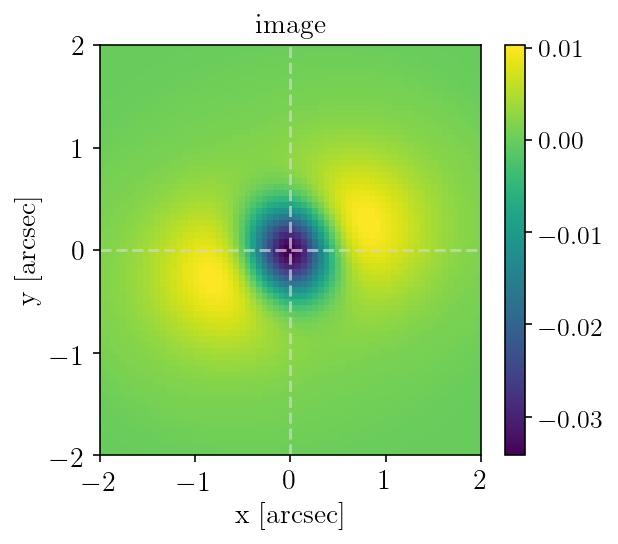

In [21]:
resImage = Image(dataInfo['image'].array-model_img, dataInfo['spaceGrid'], array_var=dataInfo['image_variance'])
resImage.display(xlim=[-2.,2.])

In [22]:
np.sqrt(dataInfo['image_variance'])

0.7084218681410399

#### residual spec

In [23]:
resSpec0 = Spec2D(dataInfo['spec'][0].array - model_spec0, dataInfo['spec_variance'][0], 
                  dataInfo['spaceGrid'], dataInfo['lambdaGrid'], line_species='Halpha', 
                  z=dataInfo['par_fid']['redshift'])

(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f29b693d0>)

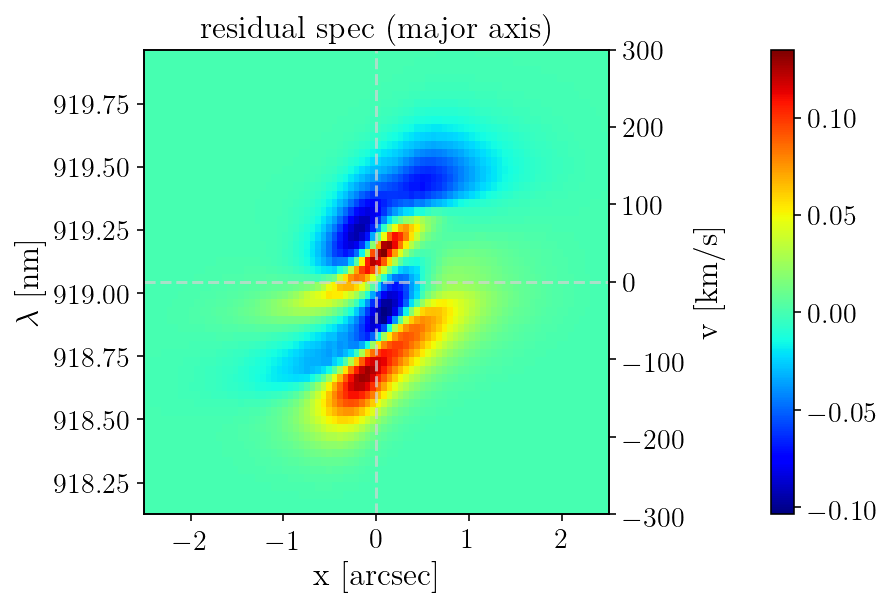

In [24]:
resSpec0.display(xlim=[-2.5,2.5], vlim=[-300., 300.], title='residual spec (major axis)')

In [25]:
np.sqrt(dataInfo['spec_variance'][0]).max()

1.9233902957264384

In [26]:
np.sqrt(dataInfo['spec_variance'][0]).min()

1.7923616785710177

In [27]:
resSpec1 = Spec2D(dataInfo['spec'][1].array - model_spec1, dataInfo['spec_variance'][1], 
                  dataInfo['spaceGrid'], dataInfo['lambdaGrid'], line_species='Halpha', 
                  z=dataInfo['par_fid']['redshift'])

(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ef9aecb10>)

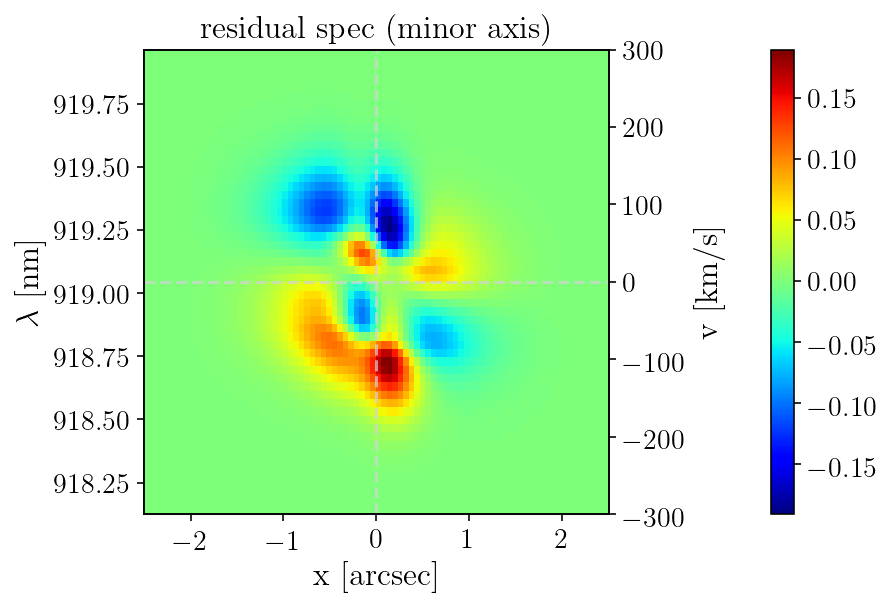

In [28]:
resSpec1.display(xlim=[-2.5,2.5], vlim=[-300., 300.], title='residual spec (minor axis)')

### chi2 

In [29]:
chi2_img = np.sum((dataInfo['image'].array-model_img)**2/dataInfo['image_variance'])
chi2_img

0.22569843

In [30]:
chi2_spec0 = np.sum((dataInfo['spec'][0].array - model_spec0)**2/dataInfo['spec_variance'][0])
chi2_spec0

0.7326918324034395

In [31]:
chi2_spec1 = np.sum((dataInfo['spec'][1].array - model_spec1)**2/dataInfo['spec_variance'][1])
chi2_spec1

1.2676634689043327